### This file records the results without the feature selection procedure.

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import k_means, dbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
# read data
X = pd.read_csv('selectedX.csv',index_col=0)

In [3]:
# GaussianMixture model
gm = GaussianMixture(n_components=3, verbose=1)
gm.fit(X)

Initialization 0
  Iteration 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [4]:
# get and save the GM groups
Xpre = gm.predict(X)

In [5]:
# save
pd.DataFrame(Xpre,columns=['GMgroup']).to_csv('GaussianMixtureResult.csv',index=False)

## The visualized GM groups (visualized by PCA)

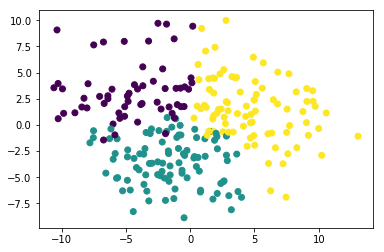

In [6]:
# Use PCA to see the effect
Xpre = pd.read_csv('GaussianMixtureResult.csv').as_matrix().reshape([-1])
pca = PCA(svd_solver='full')
X1 = pca.fit_transform(X)
plt.scatter(X1[:,0],X1[:,1],c=Xpre)

Initialization 0
  Iteration 0
Initialization converged: True


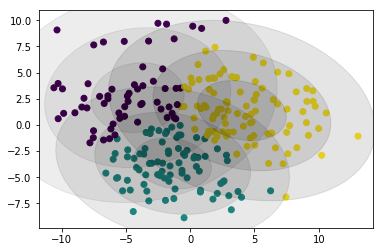

In [7]:
# use less features (2 PCA features here)
from matplotlib.patches import Ellipse
gm1 = GaussianMixture(n_components=3, verbose=1)
n_pc = 2
gm1.fit(X1[:,:n_pc])
Xpre1 = gm1.predict(X1[:,:n_pc])
plt.scatter(X1[:,0],X1[:,1],c=Xpre1)
gm1.predict_proba(X1[:,:n_pc])
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle,color='black', **kwargs))
for pos, covar, w in zip(gm1.means_, gm1.covariances_, gm1.weights_):
    draw_ellipse(pos, covar, alpha=w * 0.1 / gm1.weights_.max())

## The Subgroups of the original paper (visualized by PCA)

In [8]:
# compare with the "Subgroup"
Y = pd.read_csv('Patient_data_NEJM.csv', index_col=0)
Y = Y.sort_index()
assert all(Y.index==X.index) # make sure that the index is the same
Y['GMgroup'] = Xpre
Y[['Subgroup','GMgroup']].head()

,Subgroup,GMgroup
DLBCL sample (LYM number),,
1,Type III,1
2,GCB,2
3,GCB,2
4,GCB,2
5,ABC,1


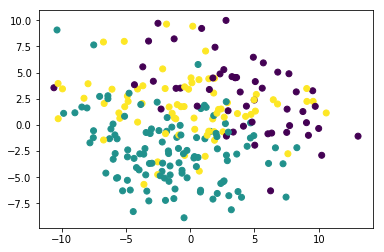

In [9]:
plt.scatter(X1[:,0],X1[:,1],c=pd.factorize(Y['Subgroup'])[0])

## The Subgroups of K-means (visualized by PCA)

In [10]:
kmeans_result = k_means(X,3)

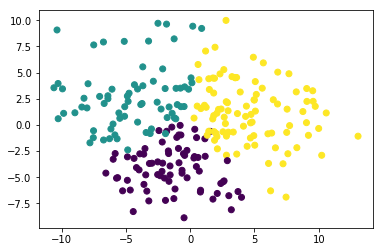

In [11]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans_result[1])